# Setup and imports

In [1]:
# imports
import numpy as np
from tueplots import bundles, figsizes
import wandb
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import pandas as pd


import sys

%load_ext autoreload
%autoreload 2

sys.path.insert(0, '.')

In [2]:
from analysis import sweep2df, plot_typography, stats2string, RED, BLUE

In [3]:
USETEX = True

In [4]:
plt.rcParams.update(bundles.icml2022(usetex=USETEX))
# plt.rcParams.update({
#     'text.latex.preamble': [r'\usepackage{amsfonts}', # mathbb
#                             r'\usepackage{amsmath}'] # boldsymbol
# })

In [5]:
plot_typography(usetex=USETEX, small=12, medium=16, big=20)


In [8]:
# Constants
ENTITY = "causal-representation-learning"
PROJECT = "rule_extrapolation"

# W&B API
api = wandb.Api(timeout=200)
runs = api.runs(ENTITY + "/" + PROJECT)

# Data loading

## baN

In [27]:
SWEEP_ID = "ntepxfn4"
sweep = api.sweep(f"{ENTITY}/{PROJECT}/{SWEEP_ID}")
filename = f"ban_{SWEEP_ID}"
ban_df,ban_train_loss,ban_val_loss,ban_val_kl,ban_val_accuracy,ban_finised,ban_ood_finised,ban_sos_finised,ban_r1,ban_r2,ban_grammatical,ban_ood_r1,ban_ood_r1_completion,ban_ood_r2,ban_ood_grammatical,ban_sos_r1,ban_sos_r2,ban_sos_grammatical= sweep2df(sweep.runs, filename, save=True, load=False)

## aNbN

In [63]:
SWEEP_ID = "iv6wtito"
sweep = api.sweep(f"{ENTITY}/{PROJECT}/{SWEEP_ID}")
filename = f"anbn_{SWEEP_ID}"
anbn_df,anbn_train_loss,anbn_val_loss,anbn_val_kl,anbn_val_accuracy,anbn_finised,anbn_ood_finised,anbn_sos_finised,anbn_r1,anbn_r2,anbn_grammatical,anbn_ood_r1,anbn_ood_r1_completion,anbn_ood_r2,anbn_ood_grammatical,anbn_sos_r1,anbn_sos_r2,anbn_sos_grammatical= sweep2df(sweep.runs, filename, save=True, load=False)

## aNbNcN

In [64]:
SWEEP_ID = "eaitw1nw"
sweep = api.sweep(f"{ENTITY}/{PROJECT}/{SWEEP_ID}")
filename = f"anbncn_{SWEEP_ID}"
anbncn_df,anbncn_train_loss,anbncn_val_loss,anbncn_val_kl,anbncn_val_accuracy,anbncn_finised,anbncn_ood_finised,anbncn_sos_finised,anbncn_r1,anbncn_r2,anbncn_grammatical,anbncn_ood_r1,anbncn_ood_r1_completion,anbncn_ood_r2,anbncn_ood_grammatical,anbncn_sos_r1,anbncn_sos_r2,anbncn_sos_grammatical= sweep2df(sweep.runs, filename, save=True, load=False)

## Matched brackets and parentheses

In [65]:
SWEEP_ID = "wr96o2v4"
sweep = api.sweep(f"{ENTITY}/{PROJECT}/{SWEEP_ID}")
filename = f"brackets_{SWEEP_ID}"
brackets_df,brackets_train_loss,brackets_val_loss,brackets_val_kl,brackets_val_accuracy,brackets_finised,brackets_ood_finised,brackets_sos_finised,brackets_r1,brackets_r2,brackets_grammatical,brackets_ood_r1,brackets_ood_r1_completion,brackets_ood_r2,brackets_ood_grammatical,brackets_sos_r1,brackets_sos_r2,brackets_sos_grammatical= sweep2df(sweep.runs, filename, save=True, load=False)

# Plots

In [30]:
# group by model

def grouped_rule_stats(df):
    grouped_df = df.groupby("model")

    stats = {}

    stats["rule_1"] = grouped_df.rule_1_accuracy4min_val_loss
    stats["rule_2"] = grouped_df.rule_2_accuracy4min_val_loss
    stats["grammatical"] = grouped_df.grammatical_accuracy4min_val_loss
    stats["finished"] = grouped_df.finished4min_val_loss

    stats["ood_rule_1"] = grouped_df.ood_rule_1_accuracy4min_val_loss
    stats["ood_rule_2"] = grouped_df.ood_rule_2_accuracy4min_val_loss
    stats["ood_rule_2_completion"] = grouped_df.ood_rule_2_completion_accuracy4min_val_loss
    stats["ood_grammatical"] = grouped_df.ood_grammatical_accuracy4min_val_loss
    stats["ood_finished"] = grouped_df.ood_finished4min_val_loss

    stats["sos_rule_1"] = grouped_df.sos_rule_1_accuracy4min_val_loss
    stats["sos_rule_2"] = grouped_df.sos_rule_2_accuracy4min_val_loss
    stats["sos_grammatical"] = grouped_df.sos_grammatical_accuracy4min_val_loss
    stats["sos_finished"] = grouped_df.sos_finished4min_val_loss

    return stats


In [66]:
ban_stats = grouped_rule_stats(ban_df)
anbn_stats = grouped_rule_stats(anbn_df)
anbncn_stats = grouped_rule_stats(anbncn_df)
brackets_stats = grouped_rule_stats(brackets_df)

## baN

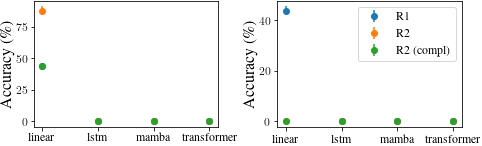

In [67]:
TICK_PADDING = 2
LABELPAD = 1
cmap = "coolwarm"

stats = ban_stats

fig = plt.figure(figsize=figsizes.icml2022_full(nrows=1, ncols=2)['figure.figsize'])

ax = fig.add_subplot(121)
# ax.grid(True, which="both", ls="-.")
# ax.set_axisbelow(True)

x_pos = list(range(len(stats["rule_1"])))

ax.errorbar(x_pos, 100*stats["rule_1"].mean(), yerr=10*stats["rule_1"].std(), fmt='o', label="R1")
ax.errorbar(x_pos, 100*stats["rule_2"].mean(), yerr=10*stats["rule_2"].std(), fmt='o', label="R2")
ax.errorbar(x_pos, 100*stats["grammatical"].mean(), yerr=10*stats["grammatical"].std(), fmt='o', label="R1+R2")
# ax.errorbar(x_pos, 100*stats["finished"].mean(), yerr=10*stats["finished"].std(), fmt='o', label="F")

ax.set_ylabel("Accuracy (\%)", labelpad=LABELPAD)

# set xtick names
ax.set_xticks(x_pos)
ax.set_xticklabels(stats["rule_1"].groups.keys())

ax2 = fig.add_subplot(122)

ax2.errorbar(x_pos, 100*stats["ood_rule_1"].mean(), yerr=10*stats["ood_rule_1"].std(), fmt='o', label="R1")
ax2.errorbar(x_pos, 100*stats["ood_rule_2"].mean(), yerr=10*stats["ood_rule_2"].std(), fmt='o', label="R2")
ax2.errorbar(x_pos, 100*stats["ood_rule_2_completion"].mean(), yerr=10*stats["ood_rule_2_completion"].std(), fmt='o', label="R2 (compl)")


# set xtick names
ax2.set_xticks(x_pos)
ax2.set_xticklabels(stats["rule_1"].groups.keys())
ax2.set_ylabel("Accuracy (\%)", labelpad=LABELPAD)


plt.legend()
ax.tick_params(axis='both', which='major', pad=TICK_PADDING)


## aNbN

In [74]:
anbn_stats["rule_2"].mean()

model
linear         1.0
lstm           1.0
mamba          1.0
transformer    0.0
Name: rule_2_accuracy4min_val_loss, dtype: float64

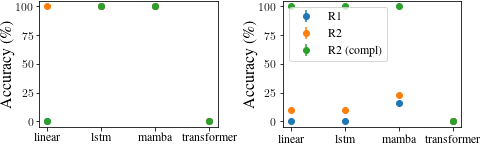

In [68]:
TICK_PADDING = 2
LABELPAD = 1
cmap = "coolwarm"

stats = anbn_stats

fig = plt.figure(figsize=figsizes.icml2022_full(nrows=1, ncols=2)['figure.figsize'])

ax = fig.add_subplot(121)
# ax.grid(True, which="both", ls="-.")
# ax.set_axisbelow(True)

x_pos = list(range(len(stats["rule_1"])))

ax.errorbar(x_pos, 100*stats["rule_1"].mean(), yerr=10*stats["rule_1"].std(), fmt='o', label="R1")
ax.errorbar(x_pos, 100*stats["rule_2"].mean(), yerr=10*stats["rule_2"].std(), fmt='o', label="R2")
ax.errorbar(x_pos, 100*stats["grammatical"].mean(), yerr=10*stats["grammatical"].std(), fmt='o', label="R1+R2")
# ax.errorbar(x_pos, 100*stats["finished"].mean(), yerr=10*stats["finished"].std(), fmt='o', label="F")

ax.set_ylabel("Accuracy (\%)", labelpad=LABELPAD)

# set xtick names
ax.set_xticks(x_pos)
ax.set_xticklabels(stats["rule_1"].groups.keys())

ax2 = fig.add_subplot(122)

ax2.errorbar(x_pos, 100*stats["ood_rule_1"].mean(), yerr=10*stats["ood_rule_1"].std(), fmt='o', label="R1")
ax2.errorbar(x_pos, 100*stats["ood_rule_2"].mean(), yerr=10*stats["ood_rule_2"].std(), fmt='o', label="R2")
ax2.errorbar(x_pos, 100*stats["ood_rule_2_completion"].mean(), yerr=10*stats["ood_rule_2_completion"].std(), fmt='o', label="R2 (compl)")


# set xtick names
ax2.set_xticks(x_pos)
ax2.set_xticklabels(stats["rule_1"].groups.keys())
ax2.set_ylabel("Accuracy (\%)", labelpad=LABELPAD)


plt.legend()
ax.tick_params(axis='both', which='major', pad=TICK_PADDING)


# plt.savefig("adversarial_rule_extrapolation.svg")

## aNbNcN

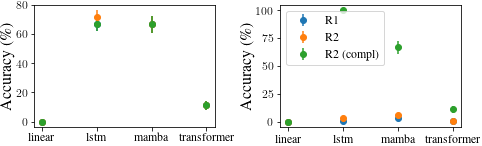

In [69]:
TICK_PADDING = 2
LABELPAD = 1
cmap = "coolwarm"

stats = anbncn_stats

fig = plt.figure(figsize=figsizes.icml2022_full(nrows=1, ncols=2)['figure.figsize'])

ax = fig.add_subplot(121)
# ax.grid(True, which="both", ls="-.")
# ax.set_axisbelow(True)

x_pos = list(range(len(stats["rule_1"])))

ax.errorbar(x_pos, 100*stats["rule_1"].mean(), yerr=10*stats["rule_1"].std(), fmt='o', label="R1")
ax.errorbar(x_pos, 100*stats["rule_2"].mean(), yerr=10*stats["rule_2"].std(), fmt='o', label="R2")
ax.errorbar(x_pos, 100*stats["grammatical"].mean(), yerr=10*stats["grammatical"].std(), fmt='o', label="R1+R2")
# ax.errorbar(x_pos, 100*stats["finished"].mean(), yerr=10*stats["finished"].std(), fmt='o', label="F")

ax.set_ylabel("Accuracy (\%)", labelpad=LABELPAD)

# set xtick names
ax.set_xticks(x_pos)
ax.set_xticklabels(stats["rule_1"].groups.keys())

ax2 = fig.add_subplot(122)

ax2.errorbar(x_pos, 100*stats["ood_rule_1"].mean(), yerr=10*stats["ood_rule_1"].std(), fmt='o', label="R1")
ax2.errorbar(x_pos, 100*stats["ood_rule_2"].mean(), yerr=10*stats["ood_rule_2"].std(), fmt='o', label="R2")
ax2.errorbar(x_pos, 100*stats["ood_rule_2_completion"].mean(), yerr=10*stats["ood_rule_2_completion"].std(), fmt='o', label="R2 (compl)")


# set xtick names
ax2.set_xticks(x_pos)
ax2.set_xticklabels(stats["rule_1"].groups.keys())
ax2.set_ylabel("Accuracy (\%)", labelpad=LABELPAD)


plt.legend()
ax.tick_params(axis='both', which='major', pad=TICK_PADDING)


## Matched brackets and parentheses

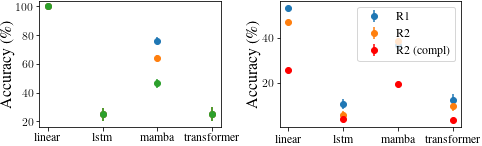

In [75]:
TICK_PADDING = 2
LABELPAD = 1
cmap = "coolwarm"

stats = brackets_stats

fig = plt.figure(figsize=figsizes.icml2022_full(nrows=1, ncols=2)['figure.figsize'])

ax = fig.add_subplot(121)
# ax.grid(True, which="both", ls="-.")
# ax.set_axisbelow(True)

x_pos = list(range(len(stats["rule_1"])))

ax.errorbar(x_pos, 100*stats["rule_1"].mean(), yerr=10*stats["rule_1"].std(), fmt='o', label="R1")
ax.errorbar(x_pos, 100*stats["rule_2"].mean(), yerr=10*stats["rule_2"].std(), fmt='o', label="R2")
ax.errorbar(x_pos, 100*stats["grammatical"].mean(), yerr=10*stats["grammatical"].std(), fmt='o', label="R1+R2")
# ax.errorbar(x_pos, 100*stats["finished"].mean(), yerr=10*stats["finished"].std(), fmt='o', label="F")

ax.set_ylabel("Accuracy (\%)", labelpad=LABELPAD)

# set xtick names
ax.set_xticks(x_pos)
ax.set_xticklabels(stats["rule_1"].groups.keys())

ax2 = fig.add_subplot(122)

ax2.errorbar(x_pos, 100*stats["ood_rule_1"].mean(), yerr=10*stats["ood_rule_1"].std(), fmt='o', label="R1")
ax2.errorbar(x_pos, 100*stats["ood_rule_2"].mean(), yerr=10*stats["ood_rule_2"].std(), fmt='o', label="R2")
ax2.errorbar(x_pos, 100*stats["ood_rule_2_completion"].mean(), yerr=10*stats["ood_rule_2_completion"].std(), fmt='o', label="R2 (compl)")


# set xtick names
ax2.set_xticks(x_pos)
ax2.set_xticklabels(stats["rule_1"].groups.keys())
ax2.set_ylabel("Accuracy (\%)", labelpad=LABELPAD)


plt.legend()
ax.tick_params(axis='both', which='major', pad=TICK_PADDING)
